<font color='blue' size="+2"> Customer Segmentation</font>


In [1]:
# Import the required libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")


In [2]:
train=pd.read_csv("Train (1).csv")
test=pd.read_csv("Test (1).csv")

In [3]:
data=pd.concat([train,test])

In [4]:
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


# **Data Understanding**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10695 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     10695 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 1002.7+ KB


In [6]:
data.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

**i am renaming this column here for better understanding**

In [7]:
data=data.rename(columns={"Var_1":"Category"})

**i am dropping id because it is not important for my task**

In [8]:
data=data.drop(columns="ID")

In [9]:
data["Age"].unique()

array([22, 38, 67, 40, 56, 32, 33, 61, 55, 26, 19, 70, 58, 41, 31, 79, 49,
       18, 36, 35, 45, 42, 83, 27, 28, 47, 29, 57, 76, 25, 72, 48, 74, 59,
       39, 51, 30, 63, 52, 60, 68, 86, 50, 43, 80, 37, 46, 69, 78, 71, 82,
       23, 20, 85, 21, 53, 62, 75, 65, 89, 66, 73, 77, 87, 84, 81, 88],
      dtype=int64)

In [10]:
data.duplicated().sum()

629

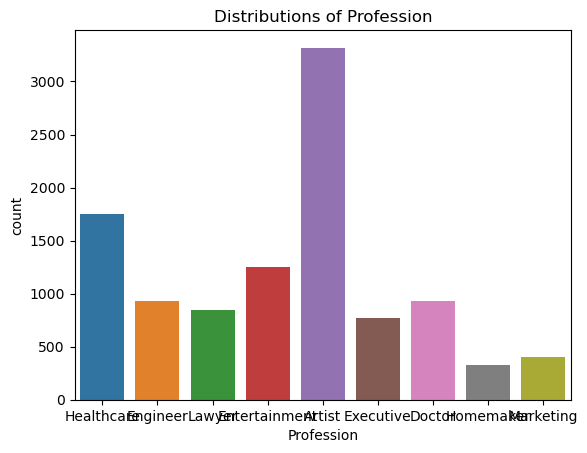

In [11]:
sns.countplot(x='Profession',data=data)
plt.title("Distributions of Profession")
plt.xticks
plt.show()

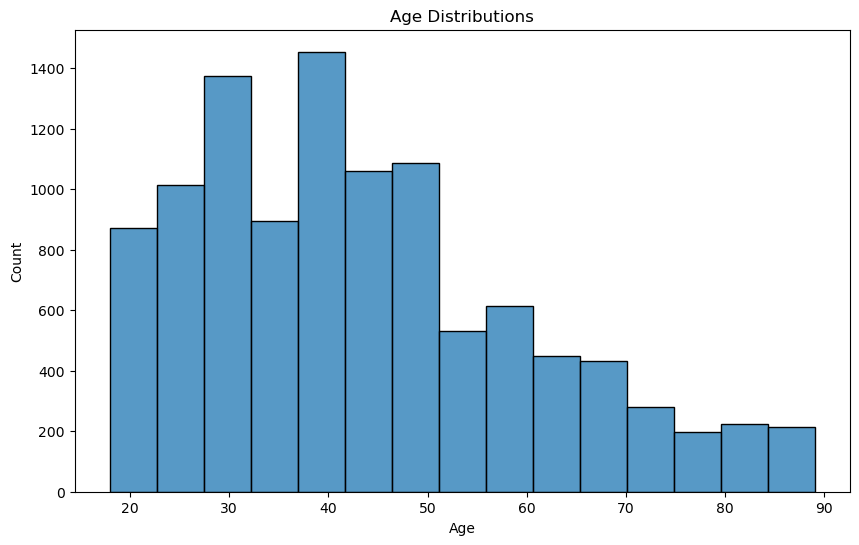

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(x='Age',data=data,bins=15)
plt.title("Age Distributions")
plt.show()

# **Data Preprocessing**

In [13]:
data.isnull().sum()

Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Category            108
Segmentation          0
dtype: int64

In [14]:
data["Ever_Married"].fillna(data["Ever_Married"].mode()[0],inplace=True)

In [15]:
data["Graduated"].fillna(data["Graduated"].mode()[0],inplace=True)

In [16]:
data["Profession"].fillna(data["Profession"].mode()[0],inplace=True)

In [17]:
data["Work_Experience"].fillna(data["Work_Experience"].mode()[0],inplace=True)

In [18]:
data["Family_Size"].fillna(data["Family_Size"].mode()[0],inplace=True)

In [19]:
data["Category"].fillna(data["Category"].mode()[0],inplace=True)

In [20]:
data.isnull().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Category           0
Segmentation       0
dtype: int64

**identifying outliers**

<Axes: xlabel='Age'>

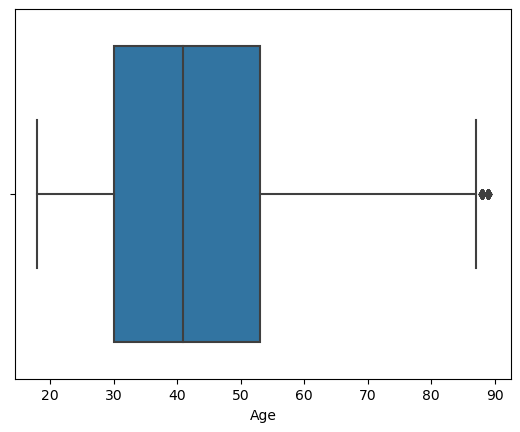

In [21]:
sns.boxplot(x=data["Age"])

In [22]:
# calculating Q1
q1=data["Age"].quantile(0.25)
print("q1:",q1)
# calculating q3
q3=data["Age"].quantile(0.75)
print("q3:",q3)
# calculating IQR
IQR=q3-q1
print("IQR:",IQR)
#calculating lowerlimit
ll=q1-(IQR*1.5)
print("ll:",ll)
# calculating upper limit
ul=q3+(IQR*1.5)
print("ul:",ul)

q1: 30.0
q3: 53.0
IQR: 23.0
ll: -4.5
ul: 87.5


In [23]:
data[(data["Age"]<ll) | (data["Age"]>ul)]

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Category,Segmentation
321,Male,Yes,89,Yes,Lawyer,13.0,Low,1.0,Cat_6,A
395,Female,Yes,89,No,Lawyer,3.0,High,1.0,Cat_6,D
699,Male,Yes,88,No,Executive,0.0,Low,1.0,Cat_6,A
753,Female,Yes,88,No,Lawyer,0.0,High,2.0,Cat_6,B
943,Male,Yes,88,Yes,Lawyer,1.0,Low,2.0,Cat_6,B
...,...,...,...,...,...,...,...,...,...,...
2394,Male,Yes,88,Yes,Artist,1.0,Low,2.0,Cat_6,C
2437,Male,Yes,89,Yes,Lawyer,0.0,Low,2.0,Cat_6,D
2498,Male,Yes,89,Yes,Lawyer,4.0,Low,1.0,Cat_6,A
2548,Male,Yes,89,Yes,Lawyer,7.0,High,2.0,Cat_6,C


In [24]:
data["Gender"].value_counts()

Male      5841
Female    4854
Name: Gender, dtype: int64

In [25]:
data["Ever_Married"].value_counts()

Yes    6353
No     4342
Name: Ever_Married, dtype: int64

In [26]:
data["Graduated"].value_counts()

Yes    6672
No     4023
Name: Graduated, dtype: int64

In [27]:
data["Age"].describe()

count    10695.000000
mean        43.511828
std         16.774158
min         18.000000
25%         30.000000
50%         41.000000
75%         53.000000
max         89.000000
Name: Age, dtype: float64

In [28]:
data["Profession"].value_counts()

Artist           3480
Healthcare       1750
Entertainment    1250
Engineer          935
Doctor            930
Lawyer            844
Executive         775
Marketing         403
Homemaker         328
Name: Profession, dtype: int64

In [29]:
data["Work_Experience"].value_counts()

1.0     4225
0.0     3087
9.0      613
8.0      612
2.0      373
4.0      346
3.0      337
5.0      270
6.0      265
7.0      256
14.0      66
10.0      64
11.0      64
12.0      60
13.0      57
Name: Work_Experience, dtype: int64

In [30]:
data["Spending_Score"].value_counts()

Low        6494
Average    2599
High       1602
Name: Spending_Score, dtype: int64

In [31]:
data["Family_Size"].value_counts()

2.0    3606
1.0    1965
3.0    1952
4.0    1823
5.0     812
6.0     290
7.0     122
8.0      65
9.0      60
Name: Family_Size, dtype: int64

In [32]:
data["Category"].value_counts()

Cat_6    7018
Cat_4    1475
Cat_3    1089
Cat_2     563
Cat_7     269
Cat_1     167
Cat_5     114
Name: Category, dtype: int64

In [33]:
data["Segmentation"].value_counts()

D    3027
A    2818
C    2442
B    2408
Name: Segmentation, dtype: int64

**Encoding**

In [34]:
data["Gender"].replace({"Male":[1],"Female":[0]},inplace=True)

In [35]:
data["Ever_Married"].replace({"No":0,"Yes":1},inplace=True)

In [36]:
data["Graduated"].replace({"No":0,"Yes":1},inplace=True)

In [37]:
data["Profession"].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing'], dtype=object)

In [38]:
data["Profession"].replace({"Healthcare":0,"Engineer":1,'Lawyer':2, 'Entertainment':3, 'Artist':4,
       'Executive':5, 'Doctor':6, 'Homemaker':7, 'Marketing':8},inplace=True)

In [39]:
data["Spending_Score"].unique()

array(['Low', 'Average', 'High'], dtype=object)

In [40]:
data["Spending_Score"].replace({"Low":0,"Average":1,"High":2},inplace=True)

In [41]:
data["Category"].unique()

array(['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2', 'Cat_5'],
      dtype=object)

In [42]:
data["Category"].replace({'Cat_4':3, 'Cat_6':5, 'Cat_7':6, 'Cat_3':2, 'Cat_1':0, 'Cat_2':1, 'Cat_5':4},inplace=True)

In [43]:
data["Segmentation"].unique()

array(['D', 'A', 'B', 'C'], dtype=object)

In [44]:
data["Segmentation"].replace({"A":0,"B":1,"C":2,"D":3},inplace=True)

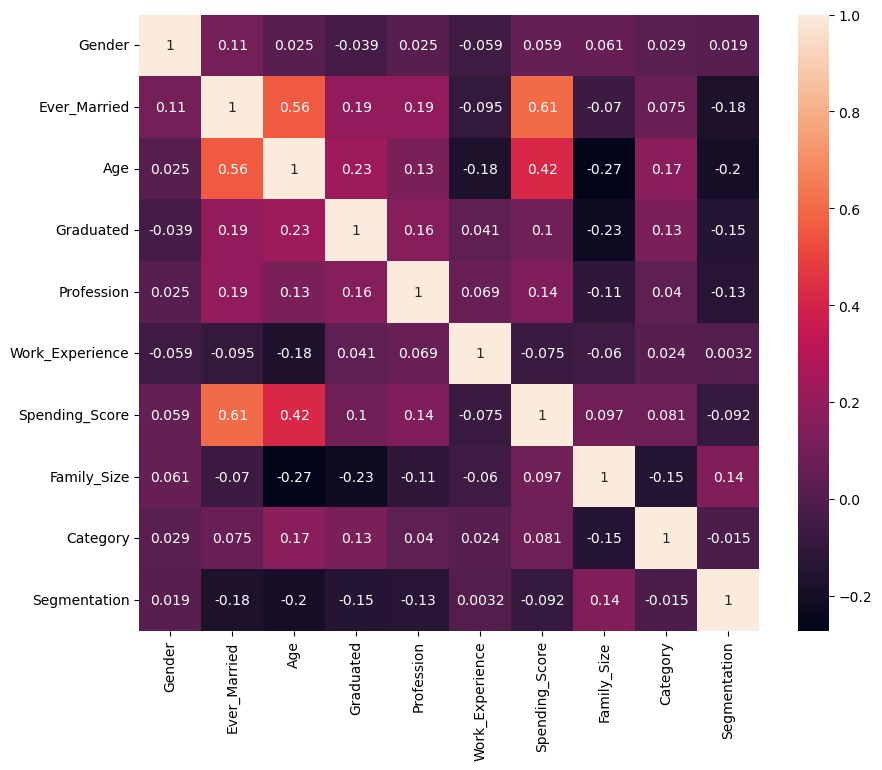

In [45]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [46]:
data.dropna(inplace=True)

**Defining X and Y**

In [47]:
x=data[['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Category']]
y=data["Segmentation"]

In [48]:
x

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Category
0,1,0,22,0,0,1.0,0,4.0,3
1,0,1,38,1,1,1.0,1,3.0,3
2,0,1,67,1,1,1.0,0,1.0,5
3,1,1,67,1,2,0.0,2,2.0,5
4,0,1,40,1,3,1.0,2,6.0,5
...,...,...,...,...,...,...,...,...,...
2622,1,0,29,0,0,9.0,0,4.0,5
2623,0,0,35,1,6,1.0,0,1.0,5
2624,0,0,53,1,3,1.0,0,2.0,5
2625,1,1,47,1,5,1.0,2,5.0,3


In [49]:
y

0       3
1       0
2       1
3       1
4       0
       ..
2622    1
2623    0
2624    2
2625    2
2626    0
Name: Segmentation, Length: 10695, dtype: int64

**Finding Best Random State**

In [50]:
from sklearn.linear_model import LogisticRegression
train=[]
test=[]
cv=[]
for i in range(1,50):
    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    l=LogisticRegression()
    l.fit(x_train,y_train)
    ŷ_train=l.predict(x_train)
    ŷ_test=l.predict(x_test)
    from sklearn.metrics import accuracy_score
    train.append(accuracy_score(y_train,ŷ_train))
    test.append(accuracy_score(y_test,ŷ_test))
    from sklearn.model_selection import cross_val_score
    cv.append(cross_val_score(l,x_train,y_train,cv=5,scoring="accuracy").mean())
df1=pd.DataFrame({"train":train,"test":test,"cv":cv})
df2=df1[(abs(df1["train"]-df1["test"])<=0.05) & (abs(df1["test"]-df1["cv"])<=0.05)]
df3=df2[df2["cv"]==df2["cv"].max()].index.to_list()[0]
print("best random state",df3)
    

best random state 42


**Train_Test_split**

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Logistic Regression

**scaling**

In [52]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

**modelling**

In [53]:
lr=LogisticRegression()
lr.fit(x,y)
ŷ_train=lr.predict(x_train)
ŷ_test=lr.predict(x_test)
print("test_accuracy",accuracy_score(y_train,ŷ_train))
print("test_accuracy",accuracy_score(y_test,ŷ_test))
print("cross_validation",cross_val_score(lr,x_train,y_train,cv=5).mean())

test_accuracy 0.38756428237494156
test_accuracy 0.3777466105656849
cross_validation 0.42134149838592505


**confusion matrix**

In [54]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test,ŷ_test)
cm

array([[ 26,  53, 115, 390],
       [ 31,  49, 166, 244],
       [ 13,  61, 230, 168],
       [ 18,  23,  49, 503]], dtype=int64)

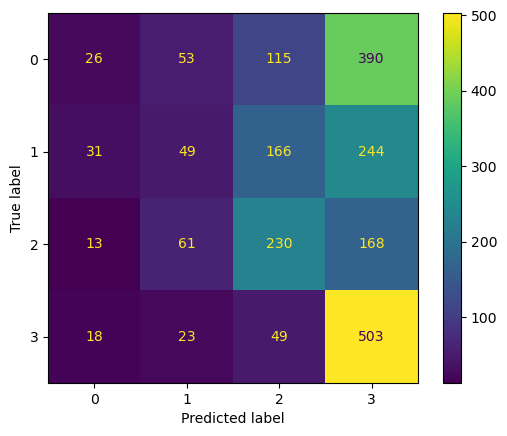

In [55]:
ConfusionMatrixDisplay(cm).plot()
plt.show()

**classification report**

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ŷ_test))

              precision    recall  f1-score   support

           0       0.30      0.04      0.08       584
           1       0.26      0.10      0.14       490
           2       0.41      0.49      0.45       472
           3       0.39      0.85      0.53       593

    accuracy                           0.38      2139
   macro avg       0.34      0.37      0.30      2139
weighted avg       0.34      0.38      0.30      2139



# K-NN

**hyper parametre tuning**

In [58]:
from sklearn.neighbors import KNeighborsClassifier
estimator=KNeighborsClassifier()
param_grid={"n_neighbors":list(range(1,50))}
from sklearn.model_selection import GridSearchCV
cv_classifier=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
cv_classifier.fit(x_train,y_train)
cv_classifier.best_params_

{'n_neighbors': 46}

**modelling**

In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=39)
knn.fit(x_train,y_train)

# assigning y predict predict
ŷ_train=knn.predict(x_train)
ŷ_test=knn.predict(x_test)

# accuracy
from sklearn.metrics import accuracy_score
print("train_accuracy",accuracy_score(y_train,ŷ_train))
print("test_accuracy",accuracy_score(y_test,ŷ_test))

from sklearn.model_selection import cross_val_score
print("cross_validation",cross_val_score(knn,x,y,cv=5).mean())

train_accuracy 0.48118279569892475
test_accuracy 0.4488078541374474
cross_validation 0.4351566152407667


**confusion matrix**

In [60]:
cm=confusion_matrix(y_test,ŷ_test)
cm

array([[239, 115, 106, 124],
       [154, 116, 150,  70],
       [ 78,  79, 255,  60],
       [156,  44,  43, 350]], dtype=int64)

**confusion matrix display**

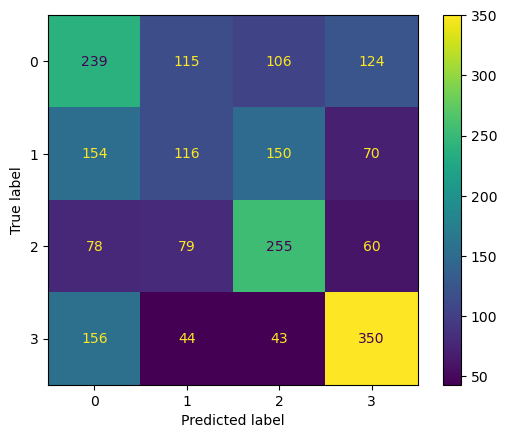

In [61]:
ConfusionMatrixDisplay(cm).plot()
plt.show()

**classification report**

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ŷ_test))

              precision    recall  f1-score   support

           0       0.38      0.41      0.39       584
           1       0.33      0.24      0.27       490
           2       0.46      0.54      0.50       472
           3       0.58      0.59      0.58       593

    accuracy                           0.45      2139
   macro avg       0.44      0.44      0.44      2139
weighted avg       0.44      0.45      0.44      2139



# SVM

**hyper parametre tuning**

In [63]:
from sklearn.svm import SVC
estimator=SVC()
param_grid={"C":[1,3,5,7,9],"kernel":["linear","polynomial","rbf","sigmoid"]}
model1=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
model1.fit(x_train,y_train)
model1.best_params_

{'C': 7, 'kernel': 'rbf'}

**modelling**

In [64]:
svm=SVC(C=3,kernel="rbf")
svm.fit(x_train,y_train)

ŷ_train=svm.predict(x_train)
ŷ_test=svm.predict(x_test)
print("train accuracy",accuracy_score(y_train,ŷ_train))
print("test accuracy",accuracy_score(y_test,ŷ_test))
print("CV",cross_val_score(svm,x_train,y_train,cv=5,scoring="accuracy").mean())

train accuracy 0.5126227208976157
test accuracy 0.46657316503038804
CV 0.45593684624502256


**confusion matrix**

In [65]:
cm=confusion_matrix(y_test,ŷ_test)
cm

array([[268,  82,  93, 141],
       [154, 111, 140,  85],
       [100,  60, 246,  66],
       [153,  24,  43, 373]], dtype=int64)

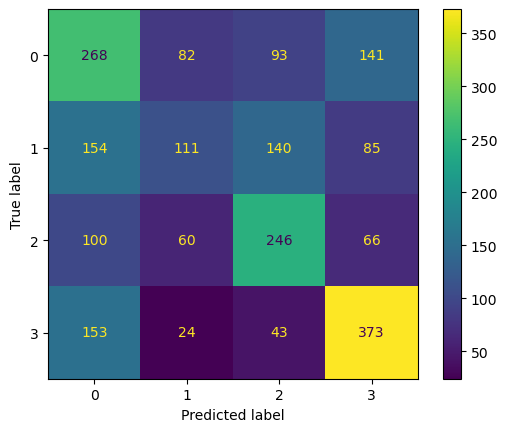

In [66]:
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [67]:
print(classification_report(y_test,ŷ_test))

              precision    recall  f1-score   support

           0       0.40      0.46      0.43       584
           1       0.40      0.23      0.29       490
           2       0.47      0.52      0.49       472
           3       0.56      0.63      0.59       593

    accuracy                           0.47      2139
   macro avg       0.46      0.46      0.45      2139
weighted avg       0.46      0.47      0.46      2139



# Decision Tree

**hyper parametre tuning**

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
estimator=DecisionTreeClassifier()
param_grid={'criterion':['gini','entropy']}
model=GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy')
model.fit(x_train,y_train)
model.best_params_

{'criterion': 'gini'}

**modelling**

In [69]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='gini')
dt.fit(x_train,y_train)

train_pred=dt.predict(x_train)
test_pred=dt.predict(x_test)
#Evaluation
print('Train Accuracy:',accuracy_score(y_train,train_pred))
print('Test Accuracy:',accuracy_score(y_test,test_pred))

print('CV score:',cross_val_score(dt,x_train,y_train,cv=5,scoring='accuracy').mean())

Train Accuracy: 0.934315100514259
Test Accuracy: 0.35530621785881256
CV score: 0.3717850958886152


**confusion matrix**

In [70]:
cm=confusion_matrix(y_test,ŷ_test)
cm

array([[268,  82,  93, 141],
       [154, 111, 140,  85],
       [100,  60, 246,  66],
       [153,  24,  43, 373]], dtype=int64)

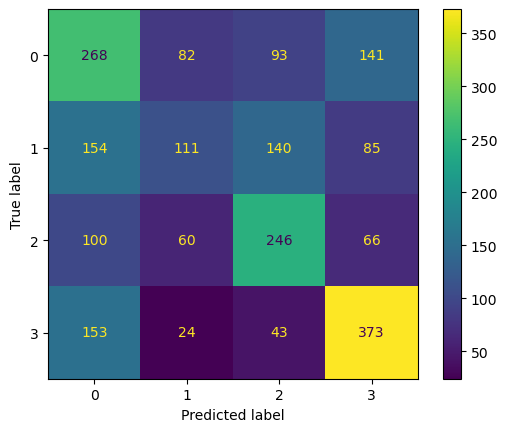

In [71]:
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [72]:
print(classification_report(y_test,ŷ_test))

              precision    recall  f1-score   support

           0       0.40      0.46      0.43       584
           1       0.40      0.23      0.29       490
           2       0.47      0.52      0.49       472
           3       0.56      0.63      0.59       593

    accuracy                           0.47      2139
   macro avg       0.46      0.46      0.45      2139
weighted avg       0.46      0.47      0.46      2139



# Random Forest

**Hyper parameter Tuning**

In [73]:
from  sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
estimator=RandomForestClassifier(random_state=42)
param_grid={"n_estimators":list(range(1,50))}
model=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
model.fit(x_train,y_train)
model.best_params_

{'n_estimators': 40}

**Modelling**

In [74]:
rf=RandomForestClassifier(n_estimators=31)
rf.fit(x_train,y_train)

ŷ_train=rf.predict(x_train)
ŷ_test=rf.predict(x_test)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
print("train_accuracy",accuracy_score(y_train,ŷ_train))
print("test_accuracy",accuracy_score(y_test,ŷ_test))
print("CV",cross_val_score(rf,x_train,y_train,cv=5,scoring="accuracy").mean())

train_accuracy 0.9331463300607761
test_accuracy 0.4198223468910706
CV 0.4142132135658766


**Confusion matrix**

In [75]:
cm=confusion_matrix(y_test,ŷ_test)
cm

array([[230, 129, 100, 125],
       [145, 129, 126,  90],
       [100, 118, 189,  65],
       [121,  74,  48, 350]], dtype=int64)

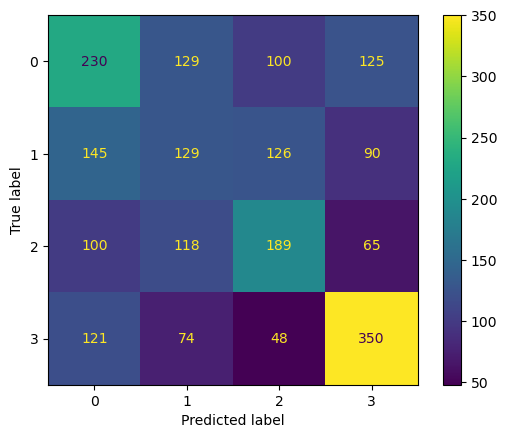

In [76]:
ConfusionMatrixDisplay(cm).plot()
plt.show()

**Classification report**

In [77]:
print(classification_report(y_test,ŷ_test))

              precision    recall  f1-score   support

           0       0.39      0.39      0.39       584
           1       0.29      0.26      0.27       490
           2       0.41      0.40      0.40       472
           3       0.56      0.59      0.57       593

    accuracy                           0.42      2139
   macro avg       0.41      0.41      0.41      2139
weighted avg       0.42      0.42      0.42      2139



# AdaBoost Classifier

**Hyper Parameter Tuning**

In [78]:
from  sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
estimator=AdaBoostClassifier(random_state=42)
param_grid={"n_estimators":list(range(1,50))}
model=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
model.fit(x_train,y_train)
model.best_params_

{'n_estimators': 37}

**Modelling**

In [79]:
ab=AdaBoostClassifier(n_estimators=18)
ab.fit(x_train,y_train)

ŷ_train=ab.predict(x_train)
ŷ_test=ab.predict(x_test)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
print("train_accuracy",accuracy_score(y_train,ŷ_train))
print("test_accuracy",accuracy_score(y_test,ŷ_test))
print("CV",cross_val_score(ab,x_train,y_train,cv=5,scoring="accuracy").mean())

train_accuracy 0.4749883122954652
test_accuracy 0.4791958859280037
CV 0.4689093250380988


**Confusion matrix**

In [80]:
cm=confusion_matrix(y_test,ŷ_test)
cm

array([[265,  53, 127, 139],
       [158,  89, 171,  72],
       [ 89,  46, 280,  57],
       [129,  26,  47, 391]], dtype=int64)

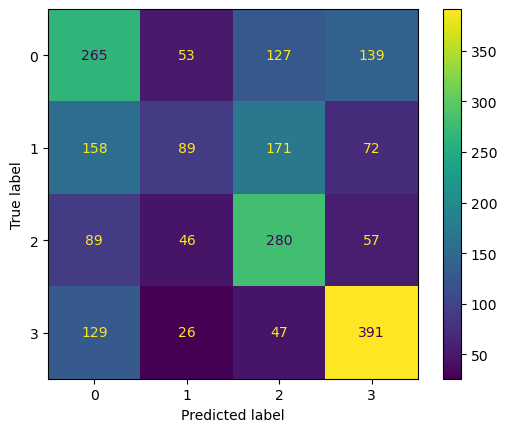

In [81]:
ConfusionMatrixDisplay(cm).plot()
plt.show()

**Classification Report**

In [82]:
print(classification_report(y_test,ŷ_test))

              precision    recall  f1-score   support

           0       0.41      0.45      0.43       584
           1       0.42      0.18      0.25       490
           2       0.45      0.59      0.51       472
           3       0.59      0.66      0.62       593

    accuracy                           0.48      2139
   macro avg       0.47      0.47      0.46      2139
weighted avg       0.47      0.48      0.46      2139



# Gradient Boost Classifier

**Hyper Parameter Tuning**

In [83]:
from  sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
estimator=GradientBoostingClassifier(random_state=42)
param_grid={"n_estimators":list(range(1,10)),"learning_rate":[0.1,0.2,0.3,0.4,0.5]}
model=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
model.fit(x_train,y_train)
model.best_params_

{'learning_rate': 0.3, 'n_estimators': 9}

**Modelling**

In [84]:
gb=GradientBoostingClassifier(n_estimators=9,learning_rate=0.4)
gb.fit(x_train,y_train)

ŷ_train=gb.predict(x_train)
ŷ_test=gb.predict(x_test)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
print("train_accuracy",accuracy_score(y_train,ŷ_train))
print("test_accuracy",accuracy_score(y_test,ŷ_test))
print("CV",cross_val_score(gb,x_train,y_train,cv=5,scoring="accuracy").mean())

train_accuracy 0.49754558204768584
test_accuracy 0.49181860682561945
CV 0.4752213549490104


**Confusion matrix**

In [85]:
cm=confusion_matrix(y_test,ŷ_test)
cm

array([[269,  96,  84, 135],
       [155, 137, 125,  73],
       [ 82,  73, 256,  61],
       [135,  30,  38, 390]], dtype=int64)

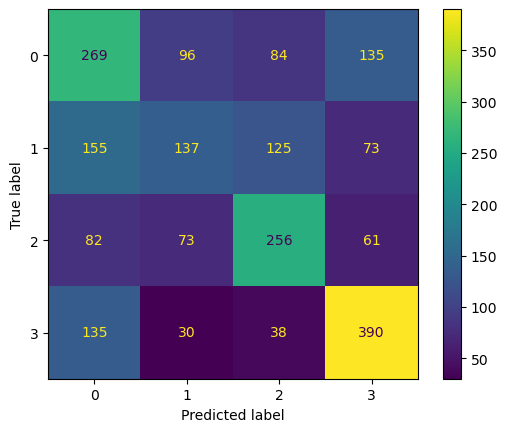

In [86]:
ConfusionMatrixDisplay(cm).plot()
plt.show()

**Classification Report**

In [87]:
print(classification_report(y_test,ŷ_test))

              precision    recall  f1-score   support

           0       0.42      0.46      0.44       584
           1       0.41      0.28      0.33       490
           2       0.51      0.54      0.53       472
           3       0.59      0.66      0.62       593

    accuracy                           0.49      2139
   macro avg       0.48      0.49      0.48      2139
weighted avg       0.48      0.49      0.48      2139



# XG Boost Classifier

**Hyper parameter Tuning**

In [89]:
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
estimator=XGBClassifier(random_state=7)
param_grid={"n_estimators":[10,20,40,60],"Max_depth":[3,4,5],"gamma":[0,0.15,0.30,0.45,1]}
model=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
model.fit(x_train,y_train)
model.best_params_

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.8/124.9 MB 1.0 MB/s eta 0:01:59
   ---------------------------------------- 1.3/124.9 MB 1.5 MB/s eta 0:01:23
   ---------------------------------------- 1.3/124.9 MB 1.5 MB/s eta 0:01:23
    --------------------------------------- 1.8/124.9 MB 1.4 MB/s eta 0:01:30
    --------------------------------------- 2.1/124.9 MB 1.5 MB/s eta 0:01:20
    --------------------------------------- 2.1/124.9 MB 1.5 MB/s eta 0:01:20
    --------------------------------------- 2.1/124.9 MB 1.5 MB/s eta 0:01:20
    ------------------------

{'Max_depth': 3, 'gamma': 1, 'n_estimators': 20}

**Modelling**

In [90]:
xgb=XGBClassifier(max_depth=3,gamma=1,n_estimators=20)
xgb.fit(x_train,y_train)

ŷ_train=xgb.predict(x_train)
ŷ_test=xgb.predict(x_test)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
print("train_accuracy",accuracy_score(y_train,ŷ_train))
print("test_accuracy",accuracy_score(y_test,ŷ_test))
print("CV",cross_val_score(xgb,x_train,y_train,cv=5,scoring="accuracy").mean())

train_accuracy 0.49731182795698925
test_accuracy 0.48246844319775595
CV 0.4762733713137095


**Confision matrix**

In [91]:
cm=confusion_matrix(y_test,ŷ_test)
cm

array([[265,  71, 105, 143],
       [162, 109, 144,  75],
       [ 90,  59, 265,  58],
       [137,  28,  35, 393]], dtype=int64)

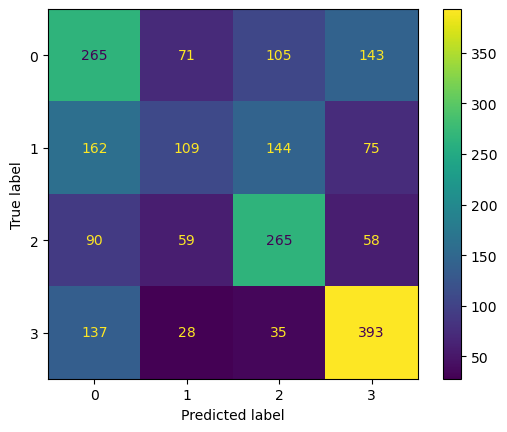

In [92]:
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [93]:
print(classification_report(y_test,ŷ_test))

              precision    recall  f1-score   support

           0       0.41      0.45      0.43       584
           1       0.41      0.22      0.29       490
           2       0.48      0.56      0.52       472
           3       0.59      0.66      0.62       593

    accuracy                           0.48      2139
   macro avg       0.47      0.48      0.46      2139
weighted avg       0.47      0.48      0.47      2139

